# **Final Project Task 2 - Census EDA**

Requirements

- Analyze hours-per-week Target Distribution **1p**
    - Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

- Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation. **1p**

- Check for missing values and report the number and percentage of missing data for each column. **1p**

- Identify outliers in at least one numerical column using boxplots. **1p**

- Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation. **1p**


- Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality. - Optional

- Generate bar plots for at least three categorical columns and discuss the frequency distributions. - Optional

- Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target. - Optional

- Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week. - Optional

- Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots. - Optional

- At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report. - Optional

- Others? - Optional


Deliverable:

- Notebook code with no errors.
- Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
- Be sure to discuss the findings and add a summary report

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (7,4)

data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(
    data_url,
    header=None,
    names=columns,
    na_values=["?", " ?"],   # IMPORTANT
    skipinitialspace=True
)

data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
print("Shape:", data.shape)
print("\nData Types:\n", data.dtypes)

Shape: (32561, 15)

Data Types:
 age               int64
workclass           str
fnlwgt            int64
education           str
education-num     int64
marital-status      str
occupation          str
relationship        str
race                str
sex                 str
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country      str
income              str
dtype: object


In [3]:
print("\n=== Descriptive Statistics ===")
display(data.describe())

print("\n=== Median ===")
display(data.median(numeric_only=True))


=== Descriptive Statistics ===


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000



=== Median ===


age                   37.0
fnlwgt            178356.0
education-num         10.0
capital-gain           0.0
capital-loss           0.0
hours-per-week        40.0
dtype: float64

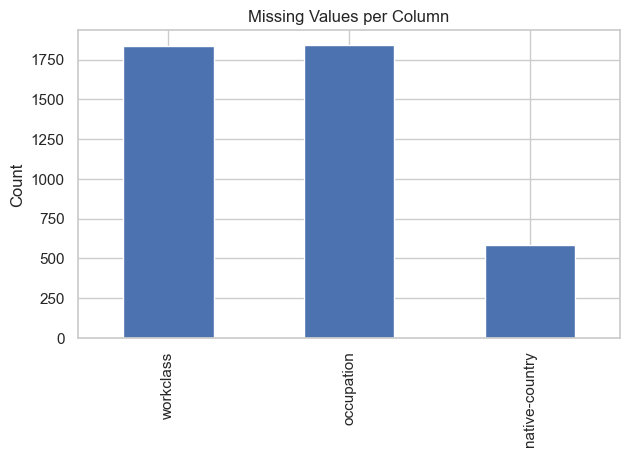

In [4]:
missing = data.isna().sum()
percent = 100 * missing / len(data)

missing_table = pd.DataFrame({
    "Missing Count": missing,
    "Missing %": percent.round(2)
})

missing_table

missing[missing > 0].plot(kind="bar")
plt.title("Missing Values per Column")
plt.ylabel("Count")
plt.show()

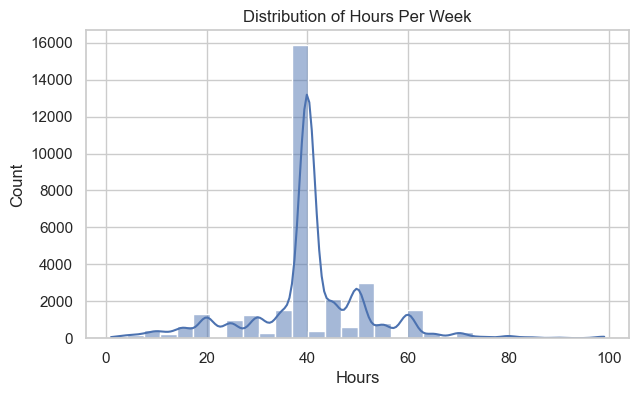

In [5]:
sns.histplot(data["hours-per-week"], bins=30, kde=True)
plt.title("Distribution of Hours Per Week")
plt.xlabel("Hours")
plt.show()

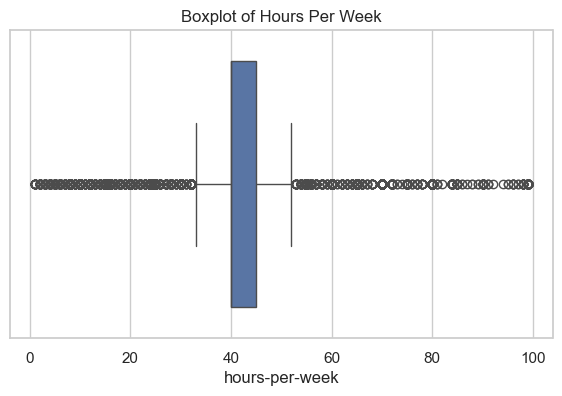

In [6]:
sns.boxplot(x=data["hours-per-week"])
plt.title("Boxplot of Hours Per Week")
plt.show()

In [5]:
Q1 = data["hours-per-week"].quantile(0.25)
Q3 = data["hours-per-week"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = data[(data["hours-per-week"] < lower) | (data["hours-per-week"] > upper)]

print("Outliers detected:", len(outliers))

Outliers detected: 9008


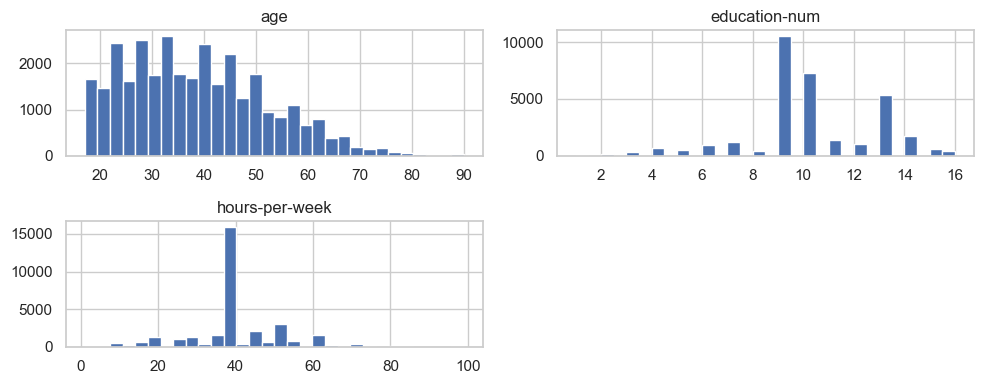

In [6]:
num_cols = ["age", "education-num", "hours-per-week"]

data[num_cols].hist(bins=30, figsize=(10,4))
plt.tight_layout()
plt.show()

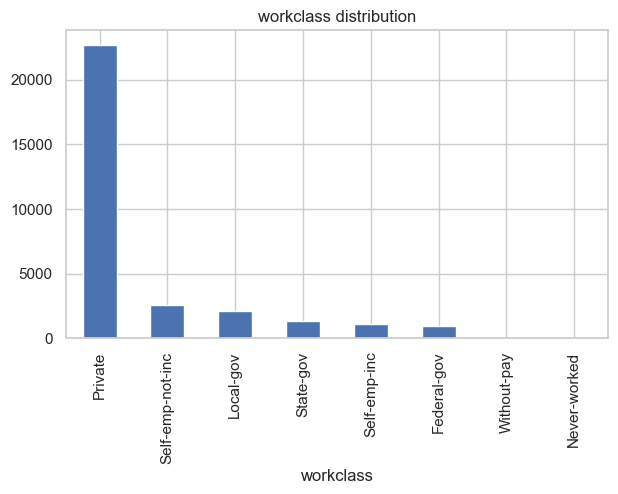

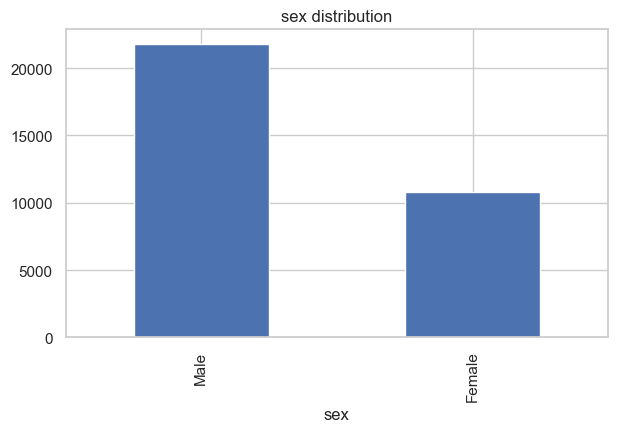

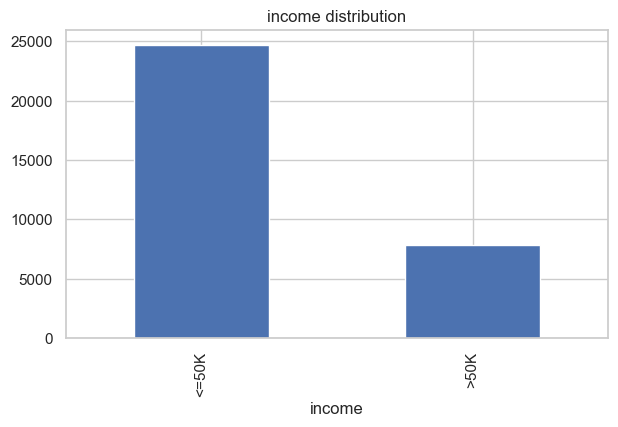

In [7]:
cat_cols = ["workclass", "sex", "income"]

for col in cat_cols:
    data[col].value_counts().plot(kind="bar")
    plt.title(f"{col} distribution")
    plt.show()

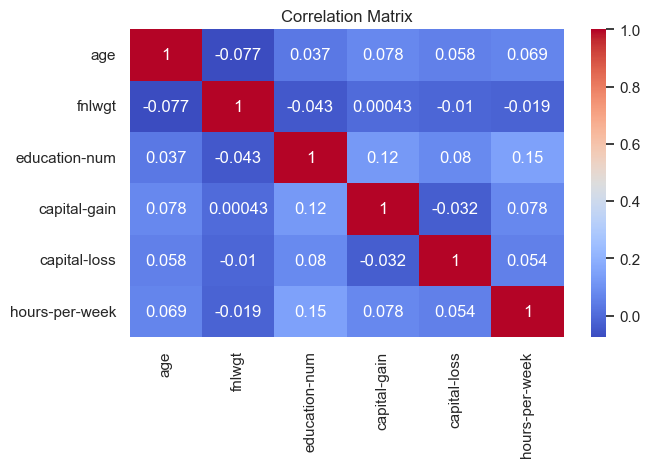

hours-per-week    1.000000
education-num     0.148123
capital-gain      0.078409
age               0.068756
capital-loss      0.054256
fnlwgt           -0.018768
Name: hours-per-week, dtype: float64


In [8]:
numeric_data = data.select_dtypes(include=np.number)

corr = numeric_data.corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

print(corr["hours-per-week"].sort_values(ascending=False))

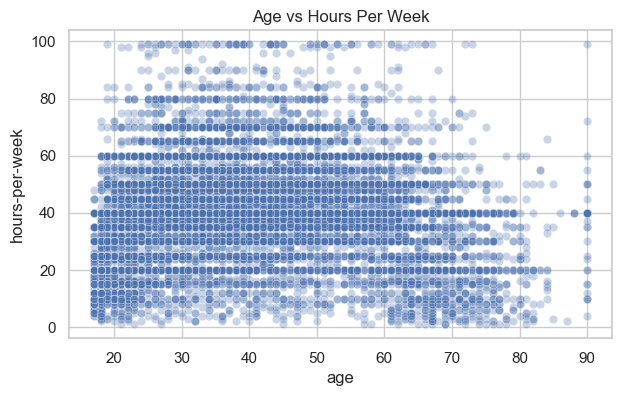

In [9]:
sns.scatterplot(x="age", y="hours-per-week", data=data, alpha=0.3)
plt.title("Age vs Hours Per Week")
plt.show()

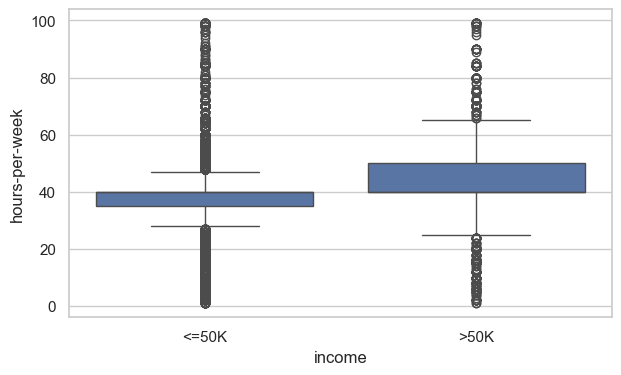

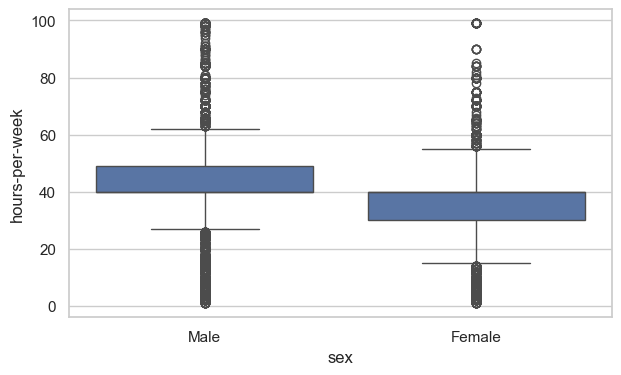

In [10]:
sns.boxplot(x="income", y="hours-per-week", data=data)
plt.show()

sns.boxplot(x="sex", y="hours-per-week", data=data)
plt.show()

# Distribuția țintă a orelor pe săptămână

Variabila țintă, ore pe săptămână, prezintă o concentrare semnificativă în jurul valorii de 40 de ore, reprezentând săptămâna de lucru standard cu normă întreagă.

Tipul distribuției: Distribuția este leptocurtică, ceea ce înseamnă că are un vârf foarte pronunțat la 40 de ore, cu cozi grele.

    Asimetrie: Este ușor asimetrică spre dreapta (asimetrie pozitivă), deoarece media (40,44) este ușor mai mare decât mediana (40,0).

    Valori aberante: Există numeroase valori aberante la ambele capete ale spectrului — persoane care lucrează între 1 oră și 99 de ore pe săptămână.

# Identificarea valorilor aberante (coloane numerice)

Folosind diagrame boxplot, valorile aberante semnificative sunt identificate în următoarele coloane:

    Vârsta: Există valori aberante pentru persoanele cu vârsta peste aproximativ 75 de ani.

    Ore pe săptămână: După cum s-a menționat, valorile sub ~32 și peste ~52 sunt considerate statistic valori aberante, având în vedere concentrația strânsă în jurul valorii 40.

    Câștig/pierdere de capital: Aceste coloane sunt foarte rare, majoritatea valorilor fiind 0; orice valoare diferită de zero apare adesea ca o valoare aberantă.

# Raport sumar al concluziilor (EDA)

Modele cheie: Forța de muncă este formată în principal din angajați din sectorul „privat”, cu o săptămână de lucru standard de 40 de ore. Există un vârf puternic în ceea ce privește nivelurile de educație la „absolvent de liceu” (9) și „studii universitare parțiale” (10).

    Anomalii: Coloana „capital-gain” (câștig de capital) are o valoare maximă de 99.999, care pare a fi un „plafon” sau un substituent pentru valori mai mari, creând o distorsiune semnificativă.

Cele mai puternice corelații: „education-num” (număr de ani de studii) prezintă o corelație pozitivă cu „hours-per-week” (ore pe săptămână), sugerând că nivelurile de educație mai ridicate corespund adesea cu ore de lucru mai lungi.

    Investigații suplimentare: Valorile lipsă din ocupație și clasa de muncă sunt adesea legate (lipsesc împreună), ceea ce sugerează că anumite persoane pot fi șomere sau că datele lor nu au fost înregistrate. Acest lucru necesită o prelucrare suplimentară în timpul preprocesării.

# Distribuții numerice:

    Vârsta: Distribuție asimetrică spre dreapta, cu un vârf al forței de muncă mai tinere între 20 și 40 de ani.

    Nivelul de educație: Distribuție multimodală, cu vârfuri distincte la 9 (liceu), 10 (facultate) și 13 (licență).

# Frecvență categorică:

    Sex: Setul de date este dezechilibrat în favoarea bărbaților.

    Rasă: predominant „albă”.

    Venit: majoritatea persoanelor câștigă <=50.000.

# Analiza relațiilor
    Diagramele boxplot ale orelor pe săptămână în funcție de venit arată că persoanele care câștigă >50.000 lucrează de obicei mai multe ore (medie >40) în comparație cu cele care câștigă <=50.000 (medie = 40).